In [287]:
#importing Libraries.

import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt 

In [277]:
#Main Objective Function i.e Potfolio_Return to whom we want to maximize.(Sign=-1) Becoz We want to maximize using minimize tool in scipy. 

def objective(weight,Return = [0.20,0.12,0.05],sign=-1):
    Portfolio_return = []
    for i in range(len(weight)):
        Portfolio_return.append(weight[i]*Return[i])
    return sign*sum(Portfolio_return)    

In [278]:
#Const1 - Sum of all weights equal to 1

def constraint1(weight):
    return (sum(weight) - 1)    

In [293]:
#Const2 - Total Risk Should be greater than 0.05(given in question).We can change for checking variation of max_return with risk. 

def constraint2(weight,risk_assestment = [0.2,0.08,0.01],sign=1): 
    total_risk = []
    for i in range(len(weight)):
        total_risk.append(weight[i]*risk_assestment[i])
    return sign*(sum(total_risk) - 0.05)    

In [294]:
#Weights Intial Assumption.

weight = [0.30,0.30,0.40]
Return = [0.20,0.12,0.05]

In [295]:
#Bounds of each weight. 

w1 = (0.20,0.40)
w2 = (0.20,0.50)
w3 = (0.3,0.6)

In [296]:
#All constraints and bounds together.

con1 = {'type':'eq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
cons = [con1,con2]
bound = [w1,w2,w3]

In [297]:
#Optimization of Weigths for maximizing return using Sequential Least Square Algo(SLSQP).

solution = minimize(objective,weight,method='SLSQP',bounds=bound,constraints=cons)

In [300]:
#New Weights after optimization.

weight = solution.x
weight

array([0.4, 0.3, 0.3])

In [299]:
#Maximum Portfolio Return given above constriants.

Pt_Return = 0
for i in range(len(weight)):
    Pt_Return = Pt_Return + weight[i]*Return[i]
Pt_Return*100

13.099999999999998

In [ ]:
#Obtaining max_return by changing risk_Index as different client prefer different risk, good to show graph to clients.

'''IF
 Risk_Index     Max_Return(%)
   =0.062           9.40
   <=0.07          10.20
   <=0.08          11.20
   <=0.09          11.96
   <=0.10          12.63
   <=0.107         13.1
   <=0.15          13.1
'''
'''Maximum return we can extract from these constraints is 13.01 (Weight = [0.4,0.3,0.3])'''

In [301]:
#Risk_Index and thier respective max_return.
Risk_Index = [0.062,0.07,0.08,0.09,0.10,0.107,.15]
Max_Return = [9.40,10.20,11.20,11.96,12.63,13.1,13.1]

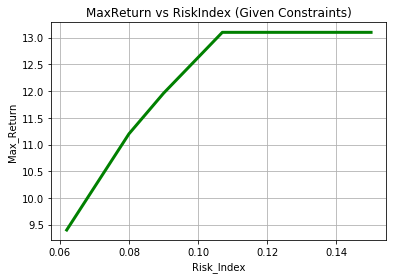

In [302]:
#Plot showing RiskIndex that upto certain risk what is my max_return (assumming my forcast return and bounds of my weight).
plt.plot(Risk_Index,Max_Return,color="green",linewidth=3)
plt.title("MaxReturn vs RiskIndex (Given Constraints)")
plt.xlabel("Risk_Index")
plt.grid(True)
plt.ylabel("Max_Return")
plt.show()